In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from unidecode import unidecode
import seaborn as sns
import warnings


%matplotlib notebook
warnings.filterwarnings('ignore')

## Getting a List of All Right Backs

In [29]:
df = pd.read_table('RB.txt', skiprows = 0, header = None)
df = df.fillna(axis = 'index', method = 'ffill')
df = df.drop_duplicates(subset = 0, keep = 'last')

In [92]:
chng = {
    0 : 'Player',
    1:'Country',
    5:'Age',
    7:'Club'
}

cols = list(chng.values())

In [93]:
df = df.rename(axis = 'columns', mapper = chng)[cols]
df.to_csv('RB2019.csv')

In [94]:
#If you want more, start from the next page of 
# https://www.fifaindex.com/players/8/?position=3&order=desc
# and paste it into RB.txt

## Getting and Cleaning the Statistics

In [110]:
stats = pd.read_csv('RBStats2019.csv')
stats = stats.set_index('Player Name')

In [111]:
fdf = df.join(stats, on = 'Player')

Need to Convert the foreign characters to english

In [112]:
names = df['Player'].values

#Decoding and concerting to plain text, and having dictionaries to convert between
plydict = {i: unidecode(i) for i in names}
realdict = {unidecode(i): i for i in names}
df['Player'] = list(plydict.values())

Mapping Single Named Players with Two Names

In [113]:
#All the Players who are there in the stats dataset but NOT in Right Back Dataset
missing = fdf['Team'].isna()

#All the players in the stats dataset
substr_list = stats.index.values.astype('str')

#All Player in RB dataset
names = list(plydict.values())

In [114]:
conv = {}

#For all players in the stats dataset
for i in substr_list:
    
    #Get Last Name
    s = i.split()[-1]
    
    #For all player in the RB Dataset
    for x in names:
        
        if x == s:
            conv[x] = i

In [115]:
df['Player'] = df['Player'].replace(conv)
fdf = df.join(stats, on = 'Player')

Getting Players with data only

In [116]:
missing = fdf['Team'].isna()
fdf = fdf[~missing]

Combining league and UCL data

In [117]:
fdf.columns

Index(['Player', 'Country', 'Age', 'Club', 'Team', 'League', 'POS', 'GP',
       'MIN', 'Y', 'YR', 'R', 'A', 'SA', 'CR', 'ACR', 'CC', 'FS', 'P', 'AP',
       'ACRO', 'BCC', 'DR', 'APW', 'TBOX', 'ECL'],
      dtype='object')

In [135]:
cols = [
    'Player', 'Country', 'Age', 'Club','League','MIN',
    
    #Attacking Stats
    'A',
    #'SA',
    'ACR',
    'FS',
    'CR',
    'AP',
    'ACRO',
    'CC',
    'P',
    #'BCC',
    'DR',
    #'APW',
    'TBOX'
]
adf = fdf.groupby(cols[:4])[cols[5:]].sum()

#Crossing %
acc_crosses = adf['ACR'] + adf['ACRO']
crosses = adf['CR']
adf['CR%'] = (acc_crosses/crosses) * acc_crosses
cols = cols + ['CR%']

#Passing %
adf['P%'] = (adf['P']/adf['AP']) * 100
cols = cols + ['P%']


logic = adf['CR'] > 50
adf = adf[logic]



adf = adf.reset_index()

In [136]:
adf.sort_values(by = 'CR%', ascending=False)

,Player,Country,Age,Club,MIN,A,ACR,FS,CR,AP,ACRO,CC,P,DR,TBOX,CR%,P%
37,Juanfran,Spain,30.0,CD Leganés,3518,3,49,33,151,1405,47,47,1106,27,56,61.033113,78.718861
64,Trent Alexander-Arnold,England,20.0,Liverpool,3296,15,79,10,266,2208,47,69,1660,21,54,59.684211,75.181159
41,Kieran Trippier,England,28.0,Spurs,2814,5,68,28,221,1869,38,72,1465,9,35,50.841629,78.384163
57,Ruben Pena,Spain,27.0,SD Eibar,2673,2,50,34,216,1349,50,44,964,62,37,46.296296,71.460341
2,Alessandro Florenzi,Italy,28.0,Roma,2711,3,50,25,141,1350,30,50,1038,10,51,45.390071,76.888889
51,Pavel Kaderabek,Czech Republic,27.0,TSG Hoffenheim,3049,4,35,22,113,1306,35,53,1004,9,80,43.362832,76.875957
9,Damian Suarez,Uruguay,31.0,Getafe CF,3240,3,61,55,188,1323,29,61,860,22,8,43.085106,65.003779
3,Allan Nyom,Cameroon,30.0,CD Leganés,1712,1,26,20,63,491,26,26,371,9,12,42.920635,75.560081
36,Joshua Kimmich,Germany,24.0,FC Bayern,3690,15,88,66,299,2996,24,98,2709,40,67,41.953177,90.420561
31,Jesus Navas,Spain,33.0,Sevilla FC,2712,5,43,31,194,1418,43,42,1092,34,86,38.123711,77.009873


## Interpreting the Data

In [68]:
reqs = [
    'Player',
    'Club',
    'Country',
    'MIN',
    'Age'
]

def per90(df1 ,df2, x):
    for i in x:
        df1[i + '90'] = df2[i]/df2['MIN'] * 90
        
    return df1

def sum_vals(d):
    n = len(sts90)
    sm = 0
    for i in range(n):
        wt = d[i]/mxs[i]
        sm = sm + wt * d[i]
    return sm

def sum_wts(d):
    n = len(sts90)
    sm = 0
    for i in range(n):
        wt = d[i]/mxs[i]
        sm = sm + wt
    return sm



df = adf[reqs]
sts = cols[6:]
sts90 = [i + '90' for i in sts]

#Convert to per 90 stats
df = per90(df, adf, sts)

mxs = [df[i].max() for i in sts90]

#Get Sum of Values, and Sum of their weights
df['SumVal'] = df[sts90].apply(sum_vals, axis = 1)
df['SumWt'] = df[sts90].apply(sum_wts, axis = 1)


In [69]:
#Include only players who have played certion number of minutes

logic = df['MIN'] > 900
xdf = df[logic]

In [70]:
xdf = xdf.sort_values(by = 'SumVal', ascending=False)

In [71]:
xdf.head(20)

,Player,Club,Country,MIN,Age,A90,ACR90,FS90,AP90,ACRO90,CC90,P90,DR90,TBOX90,SumVal,SumWt
30,Dani Alves,Paris,Brazil,1805.0,36.0,0.349030,0.897507,1.595568,78.980609,0.847645,1.745152,67.612188,0.897507,2.094183,148.442005,5.540024
151,Tony Jantschke,M'gladbach,Germany,930.0,29.0,0.096774,0.000000,1.161290,77.806452,0.000000,0.096774,70.064516,0.193548,0.580645,147.252606,2.807139
127,Rafinha,FC Bayern,Brazil,1568.0,33.0,0.114796,0.459184,1.090561,75.420918,0.344388,0.631378,69.107143,0.573980,0.975765,141.196808,3.554018
89,Kyle Walker,Manchester City,England,3523.0,28.0,0.025546,0.178825,0.536475,75.872836,0.178825,0.689753,68.362191,0.587567,0.996310,140.211210,2.984233
80,Joshua Kimmich,FC Bayern,Germany,3690.0,24.0,0.365854,2.146341,1.609756,73.073171,0.585366,2.390244,66.073171,0.975610,1.634146,136.040633,5.961411
116,Nico Elvedi,M'gladbach,Switzerland,2625.0,22.0,0.034286,0.000000,0.480000,70.902857,0.000000,0.102857,65.725714,0.308571,0.720000,125.530228,2.354331
1,Achraf Hakimi,Dortmund,Morocco,2110.0,20.0,0.298578,0.341232,1.876777,71.786730,0.341232,0.725118,61.635071,1.834123,1.919431,122.807091,4.622629
139,Sergi Roberto,FC Barcelona,Spain,2796.0,27.0,0.225322,0.225322,1.351931,68.497854,0.225322,1.094421,61.866953,0.675966,2.510730,116.817935,4.115959
73,Joe Gomez,Liverpool,England,1584.0,21.0,0.000000,0.113636,0.909091,68.011364,0.113636,0.511364,58.522727,0.397727,0.625000,107.951149,2.533785
52,Elseid Hysaj,Napoli,Albania,2258.0,25.0,0.079717,0.239150,0.916740,67.121346,0.239150,0.597874,57.914083,0.837024,1.036315,105.811046,3.071238


In [64]:
for i in sts90:
    print(i, len(xdf[xdf[i] == 0]))

A90 33
ACR90 5
FS90 0
AP90 0
ACRO90 5
CC90 0
P90 0
BCC90 27
DR90 1
TBOX90 0


## Visalizing Data

In [52]:
#How many players you want
vdf = xdf.iloc[:50]

<IPython.core.display.Javascript object>


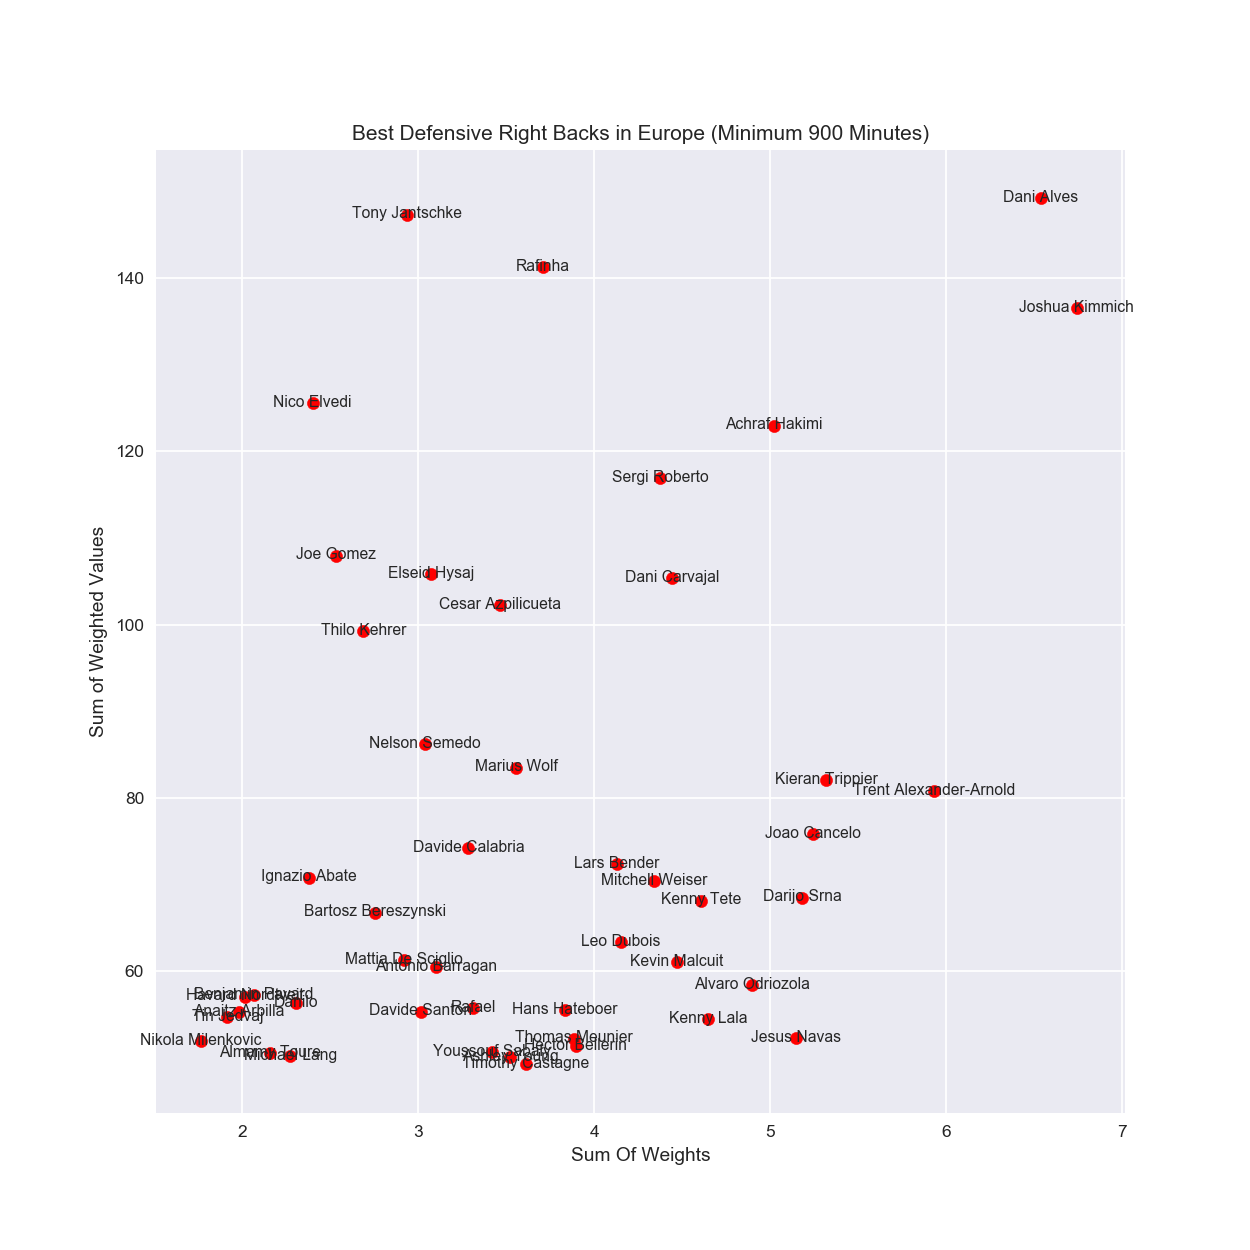

In [53]:
sns.set()

#ax = vdf.plot.scatter('SumWt', 'SumVal', figsize = (10, 10))

fig = plt.figure(figsize = (10, 10))

vdf = vdf.sort_values(by = 'SumWt', ascending=True)
n = vdf['Player'].values

x = vdf['SumWt'].values
y = vdf['SumVal'].values

config = {
    'ha': 'center', 
    'va': 'center'
}

for i, txt in enumerate(n):
    if i != 0:
        disx = x[i] - x[i-1]
        if disx > 0.0065:
            plt.scatter(x[i], y[i], color = 'red')
            plt.text(x[i], y[i]+ 0.1, txt,config,  fontsize = 9, rotation = 0)
    else:
        plt.scatter(x[i], y[i], color = 'red')
        plt.text(x[i], y[i]+ 0.1, txt, config,  fontsize = 9, rotation = 0)

plt.arrow(2.85, 8.8, 0.1, 0, width = 0.07, head_length = 0.01, color = 'black')
plt.text(2.78, 8.9, "Increasing Defensive Traits", fontsize = 10)

plt.arrow(1.93, 15.5, 0, 1, width = 0.01, head_length = 0.08, color = 'black' )
plt.text(1.95, 16, "Increasing Defensive\n Performances", fontsize = 10)



fig = plt.gcf()
ax = plt.gca()
ax.set_xlabel('Sum Of Weights')
ax.set_ylabel('Sum of Weighted Values')
ax.set_title('Best Defensive Right Backs in Europe (Minimum 900 Minutes)')
fig.savefig('rb.jpg', dpi = 300, facecolor = 'white')

## Provide Ranking System

In [802]:
xdf.set_index('Player').loc['Thomas Meunier']

Club              Paris
Country         Belgium
MIN                1888
Age                  27
BR90            6.00636
DW90            4.43326
TKLW90          1.47775
INT90            1.0964
BLK90          0.143008
SumVal          6.31458
SumWt           1.79415
BR90 Rank            36
DW90 Rank           100
TKLW90 Rank          50
INT90 Rank          102
BLK90 Rank          109
Name: Thomas Meunier, dtype: object

In [760]:
def get_ranks(df, sts90):
    for i in sts90:
        df[i + ' Rank'] = df[i].rank(ascending = False)
        
    return df
xdf = get_ranks(xdf, sts90)

In [60]:
xdf['BCC90]'.values_counts?

Object `values_counts` not found.


In [63]:
xdf['BCC90'].value_counts?

Object `value_counts` not found.


In [ ]:
xdf['BCC90'].value_counts

In [ ]:
xdf['BCC90'].value_counts

In [133]:
adf.set_index('Player').loc['Aaron Wan-Bissaka']

Country           England
Age                    21
Club       Crystal Palace
MIN                  3135
A                       3
ACR                    12
FS                     16
CR                     56
AP                   1165
ACRO                   12
CC                     14
P                     851
DR                     61
TBOX                   30
CR%               42.8571
P%                73.0472
Name: Aaron Wan-Bissaka, dtype: object